In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as F

import sys
sys.path.insert(1, '../src')
from alg_8 import EDTransformer

In [2]:
max_seq_len = 8
embed_dim = 50
vocab_size = 12

bs = 32
z_ids = torch.randint(0,vocab_size, size = (bs*2, max_seq_len)) 
x_ids = (z_ids+5)%vocab_size

In [3]:
ed_seq2seq = EDTransformer(embed_dim=embed_dim, mlp_dim=32, max_seq_len=max_seq_len,
                            L_dec=3, L_enc=3, vocab_size=vocab_size, num_heads=3)


neg_ll_loss = nn.NLLLoss()
optimizer = torch.optim.SGD(ed_seq2seq.parameters(), lr=0.10, momentum=0.9)
losses = []

In [4]:
%%time
for _ in range(1000):
    optimizer.zero_grad()
    output = ed_seq2seq(z_ids, x_ids)
    loss = neg_ll_loss(torch.log(output.view(-1,vocab_size,max_seq_len)), x_ids)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())


In [ ]:
import matplotlib.pyplot as plt

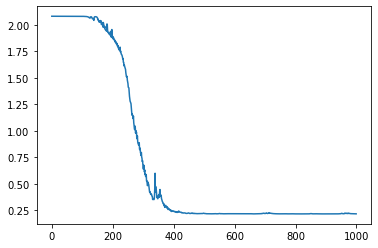

In [ ]:
plt.plot(losses)